In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import io, color
from skimage.transform import resize
from skimage.filters import convolve

# Load example image
image = data.camera()

# Convert the image to grayscale if it's not already
if len(image.shape) > 2:
    image = color.rgb2gray(image)

# Define different convolutional kernels
kernels = {
    'Identity': np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]]),
    'Edge Detection': np.array([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]]),
    'Gaussian Blur': np.array([[1,  2,  1],
                               [2,  4,  2],
                               [1,  2,  1]]) / 16
}

# Apply each kernel to the image and display the result
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (kernel_name, kernel) in enumerate(kernels.items()):
    convolved_image = convolve(image, kernel)
    plt.subplot(2, 2, i + 2)
    plt.imshow(convolved_image, cmap='gray')
    plt.title(kernel_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


ImportError: cannot import name 'convolve' from 'skimage.filters' (/Users/johanvikmathisen/Desktop/Fag/Matematikk/Master/Generative-SSL-VQVAE-modelling/.venv/lib/python3.11/site-packages/skimage/filters/__init__.py)

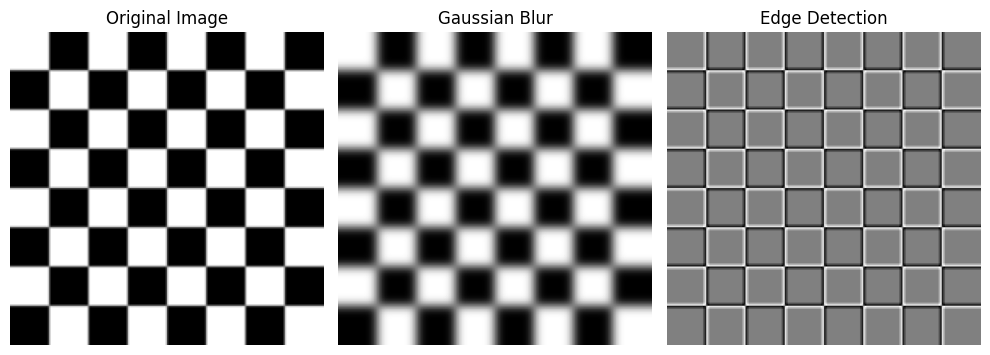

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy.signal import convolve2d

# Load example image
image = data.camera()

image = data.checkerboard()



# Convert the image to grayscale if it's not already
if len(image.shape) > 2:
    image = color.rgb2gray(image)

sigma = 3
size = int(6 * sigma + 1)
gaussian_kernel = np.outer(np.exp(-(np.arange(size) - size // 2)**2 / (2 * sigma**2)),
                           np.exp(-(np.arange(size) - size // 2)**2 / (2 * sigma**2)))
gaussian_kernel /= np.sum(gaussian_kernel)

# Define different convolutional kernels
kernels = {
    'Gaussian Blur': gaussian_kernel,                          
    'Edge Detection': np.array([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]])
    # 'Gaussian Blur': np.array([[1,  2,  1],
    #                            [2,  3,  2],
    #                            [1,  2,  1]])/16
}

# Apply each kernel to the image and display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (kernel_name, kernel) in enumerate(kernels.items()):
    convolved_image = convolve2d(image, kernel, mode='same', boundary='symm')
    plt.subplot(1, 3, i + 2)
    plt.imshow(convolved_image, cmap='gray')
    plt.title(kernel_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(400, 600, 3)


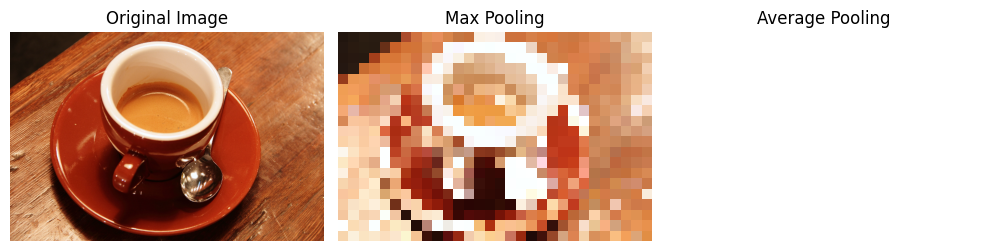

(400, 600, 3) (20, 30, 3) (20, 30, 3)


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.measure import block_reduce

# Load example image
image = data.camera()
# image = data.coffee()

print(image.shape)
# Define max pooling parameters
pool_size = (20, 20)  # Size of the pooling window

# Apply max pooling to the image
maxpooled_image = block_reduce(image, pool_size, np.max)
avgpooled_image = block_reduce(image, pool_size, np.mean)


# Display original and pooled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(maxpooled_image, cmap='gray')
plt.title('Max Pooling')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(avgpooled_image, cmap='gray')
plt.title('Average Pooling')
plt.axis('off')

plt.tight_layout()
plt.show()


print(image.shape, maxpooled_image.shape ,avgpooled_image.shape)

/var/folders/tz/7b83mvms205g7153tt6m1lnr0000gn/T/ipykernel_33094/1187260142.py:20: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  psf = np.outer(signal.gaussian(10, 1), signal.gaussian(10, 1))


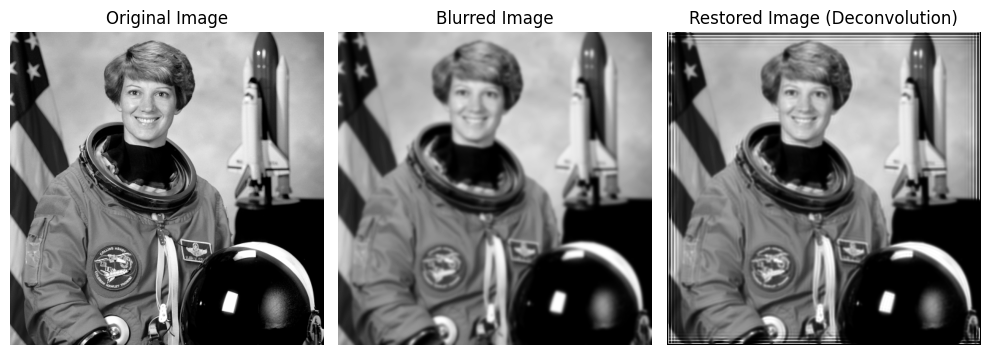

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage import filters, restoration
from scipy import signal
# Load example image
image = data.astronaut()

# Convert the image to grayscale if it's not already
if len(image.shape) > 2:
    image = color.rgb2gray(image)

# Add artificial blurring to the image
blurred_image = filters.gaussian(image, sigma=2)

# Perform deconvolution using Richardson-Lucy algorithm
# psf = np.array([[1,  2,  1],[2,  3,  2], [1,  2,  1]])/1
# np.ones((5, 5)) / 25
# Create a 2D Gaussian kernel as the PSF
psf = np.outer(signal.gaussian(10, 1), signal.gaussian(10, 1))

restored_image = restoration.richardson_lucy(blurred_image, psf = np.ones((5, 5)) / 25 )

# Display original, blurred, and restored images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image (Deconvolution)')
plt.axis('off')

plt.tight_layout()
plt.show()
